In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load & clean places data
path = "/Users/remihendershott/GLP1-trends/data/PLACES__Local_Data_for_Better_Health,_Census_Tract_Data_2024_release_20251124.csv"

places_df = pd.read_csv(path)

places_df.head()

,Year,StateAbbr,StateDesc,CountyName,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,MeasureId,DataValueTypeID,Short_Question_Text
0,2022,FL,Florida,Miami-Dade,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,17.7,13.6,22.6,"1,434","1,005",12086009505,ACCESS2,CrdPrv,Health Insurance
1,2022,FL,Florida,Miami-Dade,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,12.0,9.5,15.4,"3,965","2,988",12086007806,ACCESS2,CrdPrv,Health Insurance
2,2022,FL,Florida,Miami-Dade,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,25.6,20.8,30.4,"3,042","2,298",12086003400,ACCESS2,CrdPrv,Health Insurance
3,2022,FL,Florida,Miami-Dade,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,33.6,28.4,38.9,"7,337","5,268",12086010804,ACCESS2,CrdPrv,Health Insurance
4,2022,FL,Florida,Miami-Dade,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,39.0,31.8,46.3,"2,535","2,156",12086005407,ACCESS2,CrdPrv,Health Insurance


In [8]:
columns_to_keep = [
    "Year",
    "StateAbbr",
    "StateDesc",
    "LocationID",
    "Category",
    "MeasureId",
    "Measure",
    "Data_Value",
    "Low_Confidence_Limit",
    "High_Confidence_Limit",
    "TotalPop18plus"
]

places_df_clean = places_df[columns_to_keep].copy()
places_df_clean.head()


,Year,StateAbbr,StateDesc,LocationID,Category,MeasureId,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPop18plus
0,2022,FL,Florida,12086009505,Prevention,ACCESS2,Current lack of health insurance among adults ...,17.7,13.6,22.6,"1,005"
1,2022,FL,Florida,12086007806,Prevention,ACCESS2,Current lack of health insurance among adults ...,12.0,9.5,15.4,"2,988"
2,2022,FL,Florida,12086003400,Prevention,ACCESS2,Current lack of health insurance among adults ...,25.6,20.8,30.4,"2,298"
3,2022,FL,Florida,12086010804,Prevention,ACCESS2,Current lack of health insurance among adults ...,33.6,28.4,38.9,"5,268"
4,2022,FL,Florida,12086005407,Prevention,ACCESS2,Current lack of health insurance among adults ...,39.0,31.8,46.3,"2,156"


In [9]:
# Pivot wide
df_small = places_df_clean.copy()

df_wide = df_small.pivot_table(
    index=["LocationID", "StateAbbr", "StateDesc", "Year", "TotalPop18plus"],
    columns="MeasureId",
    values="Data_Value"
).reset_index()

# Flatten column names 
df_wide.columns.name = None

df_wide.head()


,LocationID,StateAbbr,StateDesc,Year,TotalPop18plus,ACCESS2,DIABETES,MHLTH,OBESITY
0,1001020100,AL,Alabama,2022,"1,370",11.2,13.8,20.0,39.3
1,1001020200,AL,Alabama,2022,"1,584",10.7,14.7,19.0,42.6
2,1001020300,AL,Alabama,2022,"2,485",10.9,14.1,19.7,40.3
3,1001020400,AL,Alabama,2022,"3,344",8.4,13.4,17.8,36.9
4,1001020501,AL,Alabama,2022,"3,369",7.9,11.4,16.4,35.6


In [ ]:
# Summary stats
df_wide[["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]].describe()

,OBESITY,DIABETES,MHLTH,ACCESS2
count,83522.000000,83522.000000,83522.000000,83522.000000
mean,34.431157,12.429504,17.157563,11.478264
std,7.162231,3.794903,3.539844,7.465959
min,10.400000,0.700000,5.200000,1.300000
25%,29.600000,9.900000,14.700000,6.500000
50%,34.600000,12.000000,16.900000,9.300000
75%,39.200000,14.400000,19.200000,14.100000
max,64.400000,45.700000,42.800000,62.800000


In [12]:
state_summary = df_wide.groupby("StateAbbr")[["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]].mean().round(2)

state_summary.head()

,OBESITY,DIABETES,MHLTH,ACCESS2
StateAbbr,,,,
AK,32.96,9.62,16.60,10.53
AL,40.52,15.58,19.15,11.82
AR,38.98,15.55,20.28,11.56
AZ,33.63,12.77,17.70,13.68
CA,28.57,11.68,16.67,11.17


In [13]:
df_wide[["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]].corr()

,OBESITY,DIABETES,MHLTH,ACCESS2
OBESITY,1.000000,0.715865,0.647748,0.459638
DIABETES,0.715865,1.000000,0.420627,0.538574
MHLTH,0.647748,0.420627,1.000000,0.531974
ACCESS2,0.459638,0.538574,0.531974,1.000000


In [30]:
# Load in google trend data
geo_df = pd.read_csv("../data/geoMap-9.csv", skiprows=2)
multi_df = pd.read_csv("../data/multiTimeline-6.csv", skiprows=2)

# clean geo 
geo_df.columns = (
    geo_df.columns
    .str.replace(r":.*", "", regex=True)  
    .str.strip()
)

def clean_percent_series(s):
    return (
        s.astype(str)
         .str.replace("<1%", "0.5%", regex=False)   
         .str.rstrip("%")
         .replace("", pd.NA)
         .astype(float)
    )

for col in ["ozempic", "monjauro", "wegovy"]:
    geo_df[col] = clean_percent_series(geo_df[col])

geo_df.head()

,Region,ozempic,monjauro,wegovy
0,West Virginia,74.0,0.5,26.0
1,Louisiana,79.0,0.5,21.0
2,Oklahoma,77.0,0.5,23.0
3,Mississippi,70.0,0.5,30.0
4,Connecticut,78.0,0.5,22.0


In [31]:
# clean multi df
multi_df.columns = (
    multi_df.columns
    .str.replace(r":.*", "", regex=True)   
    .str.strip()
)

multi_df["Week"] = pd.to_datetime(multi_df["Week"])

multi_df.head()


,Week,ozempic,monjauro,wegovy
0,2020-11-22,3,0,0
1,2020-11-29,3,0,0
2,2020-12-06,3,0,0
3,2020-12-13,3,0,0
4,2020-12-20,2,0,0


In [32]:
# merge places with geo df
state_df = ( # aggregate by state
    df_wide
    .groupby("StateDesc")[["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]]
    .mean()
    .reset_index()
)

state_df.head()


,StateDesc,OBESITY,DIABETES,MHLTH,ACCESS2
0,Alabama,40.518601,15.582378,19.146434,11.820000
1,Alaska,32.961932,9.615341,16.599432,10.532955
2,Arizona,33.631954,12.769770,17.698966,13.681954
3,Arkansas,38.975152,15.547747,20.278076,11.558465
4,California,28.574950,11.679140,16.671455,11.167376


In [ ]:
state_merged = state_df.merge(
    geo_df,              
    left_on="StateDesc", # states on places
    right_on="Region",   # states on geo df
    how="inner"
)

# drop dupe region col
state_merged = state_merged.drop(columns=["Region"])

state_merged.head()


,StateDesc,OBESITY,DIABETES,MHLTH,ACCESS2,ozempic,monjauro,wegovy
0,Alabama,40.518601,15.582378,19.146434,11.820000,70.0,0.5,30.0
1,Alaska,32.961932,9.615341,16.599432,10.532955,74.0,0.5,26.0
2,Arizona,33.631954,12.769770,17.698966,13.681954,79.0,0.5,21.0
3,Arkansas,38.975152,15.547747,20.278076,11.558465,77.0,0.5,23.0
4,California,28.574950,11.679140,16.671455,11.167376,78.0,0.5,22.0


In [ ]:
# merge places with nation trends
# compute national averages
nat_health = (
    df_wide[["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]]
    .mean()
    .to_frame()
    .T
)

nat_health

,OBESITY,DIABETES,MHLTH,ACCESS2
0,34.431157,12.429504,17.157563,11.478264


In [35]:
# add to mutli df
for col in ["OBESITY", "DIABETES", "MHLTH", "ACCESS2"]:
    multi_df[col] = nat_health[col].iloc[0]

multi_df.head()

,Week,ozempic,monjauro,wegovy,OBESITY,DIABETES,MHLTH,ACCESS2
0,2020-11-22,3,0,0,34.431157,12.429504,17.157563,11.478264
1,2020-11-29,3,0,0,34.431157,12.429504,17.157563,11.478264
2,2020-12-06,3,0,0,34.431157,12.429504,17.157563,11.478264
3,2020-12-13,3,0,0,34.431157,12.429504,17.157563,11.478264
4,2020-12-20,2,0,0,34.431157,12.429504,17.157563,11.478264


In [36]:
# analysis with geo df merged with places
corr = state_merged[[
    "OBESITY", "DIABETES", "MHLTH", "ACCESS2",
    "ozempic", "monjauro", "wegovy"
]].corr()

corr

,OBESITY,DIABETES,MHLTH,ACCESS2,ozempic,monjauro,wegovy
OBESITY,1.000000,0.744987,0.539450,0.255855,-0.168321,NaN,0.168321
DIABETES,0.744987,1.000000,0.651048,0.428580,-0.100074,NaN,0.100074
MHLTH,0.539450,0.651048,1.000000,0.297517,0.045316,NaN,-0.045316
ACCESS2,0.255855,0.428580,0.297517,1.000000,0.240823,NaN,-0.240823
ozempic,-0.168321,-0.100074,0.045316,0.240823,1.000000,NaN,-1.000000
monjauro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wegovy,0.168321,0.100074,-0.045316,-0.240823,-1.000000,NaN,1.000000


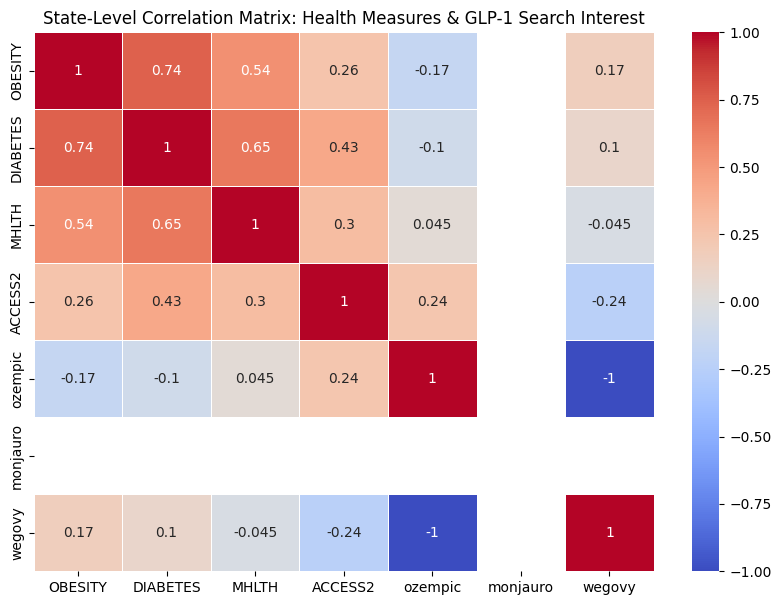

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("State-Level Correlation Matrix: Health Measures & GLP-1 Search Interest")
plt.show()

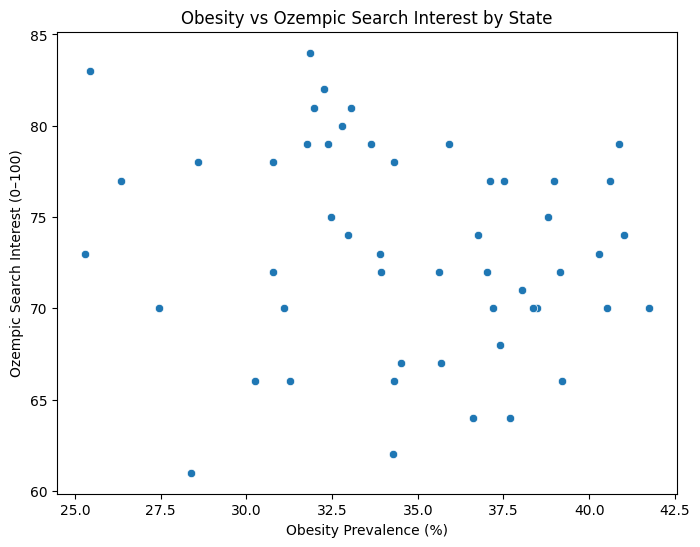

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=state_merged,
    x="OBESITY",
    y="ozempic"
)
plt.title("Obesity vs Ozempic Search Interest by State")
plt.xlabel("Obesity Prevalence (%)")
plt.ylabel("Ozempic Search Interest (0–100)")
plt.show()


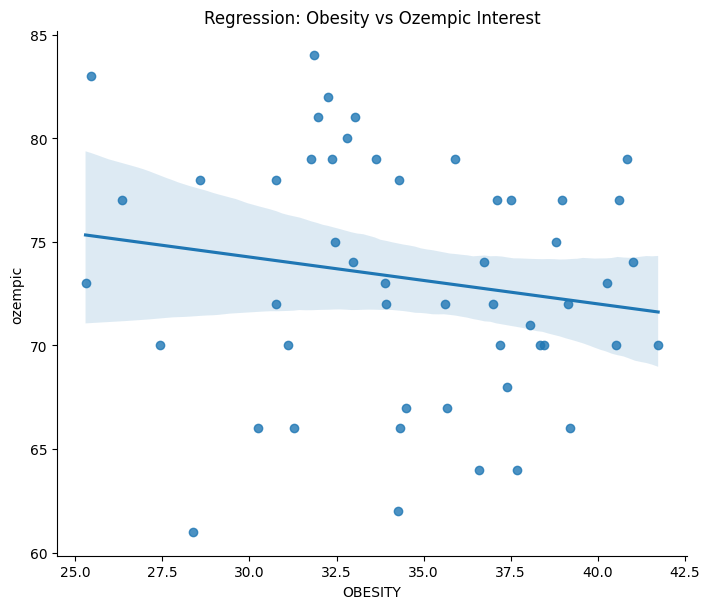

In [41]:
sns.lmplot(
    data=state_merged,
    x="OBESITY",
    y="ozempic",
    height=6,
    aspect=1.2
)
plt.title("Regression: Obesity vs Ozempic Interest")
plt.show()


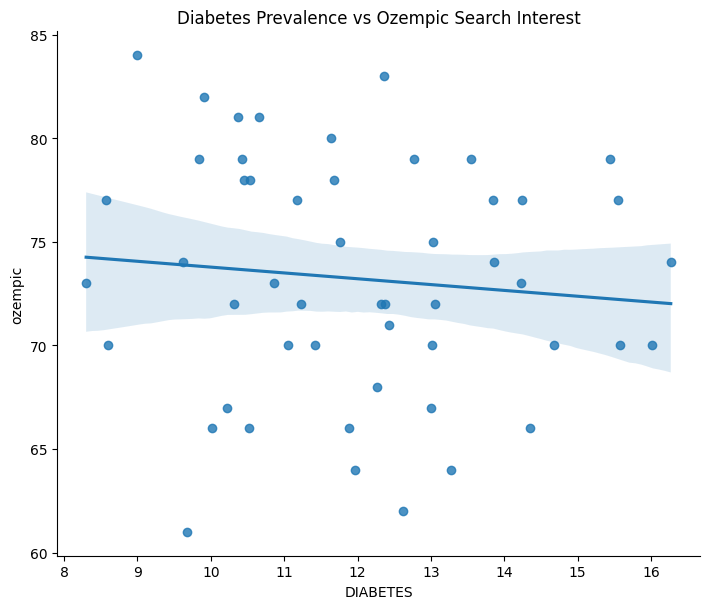

In [42]:
sns.lmplot(
    data=state_merged,
    x="DIABETES",
    y="ozempic",
    height=6,
    aspect=1.2
)
plt.title("Diabetes Prevalence vs Ozempic Search Interest")
plt.show()
